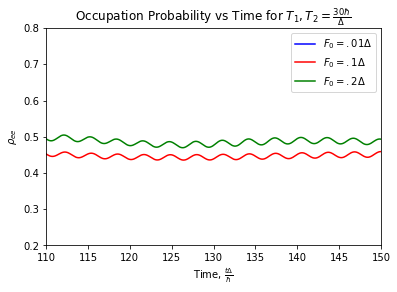

In [13]:
from qutip import *
import time
import numpy as np
import matplotlib.pyplot as plt




T1=30
T2=30
gamma1=1/(4*T1)
gamma2=(1/T2-2*gamma1)/2
L1=sigmax()-1j*sigmay()
L2=-1*sigmaz()
C1=np.sqrt(gamma1)*L1
C2=np.sqrt(gamma2)*L2
psi0 = basis(2,1)

options=qutip.Options(store_states=True)


times= np.linspace(0.0, 200, 4000)
 

F0list=[.01,.1,.2,]

rhoee=[]

for F0 in F0list:
    H0=(1/2)*sigmaz()
    H1=sigmax()
    def H1_coeff(times,args):
        return F0*np.sin(times)
    H = [H0,[H1,H1_coeff]]
    result = mesolve(H, psi0.proj(), times,[C1,C2],[],options=options)
    rhoee.append(np.array([state.full()[0,0].real for state in result.states]))
    
fig, ax = plt.subplots() 
ax.set_ylim(.2,.8)
ax.set_xlim(110,150) #Set to 0,200 between parentheses to obtain FIGURE 3
ax.set_title(r'Occupation Probability vs Time for $T_{1}, T_{2} = \frac{30 \hbar}{\Delta}$')
ax.plot(times,rhoee[0],'blue',label=r'$F_{0}=.01 \Delta$') 
ax.plot(times,rhoee[1], 'red',label=r'$F_{0}=.1 \Delta$')
ax.plot(times,rhoee[2], 'green',label=r'$F_{0}=.2 \Delta$')
ax.set_xlabel(r'Time, $\frac{t \Delta }{\hbar}$') 
ax.set_ylabel(r'$\rho_{ee} $') 
ax.legend()  
    #ax.legend()
plt.show() 
